<a href="https://colab.research.google.com/github/coding-cosmos/Sluice-Gate-Cavitation-Index/blob/main/notebooks/Sluice_Gate_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SHAP

## Utils

In [ ]:
!pip install shap

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
def SHAP(model, X):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(X)

    shap.summary_plot(shap_values, X)
    shap.plots.bar(shap_values)
    # shap.summary_plot(shap_values, X_display, plot_type="bar")


## Dimensional

In [ ]:
# Load and rename columns
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dim.csv")
df.columns = ['AR', 'phi', 'L', 'QW', 'Qa', 'Va', 'h', 'R', 'sigma']
X = df.drop(columns=['sigma'])
y = df['sigma']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
params_gbm_20 = {'n_estimators': 310, 'max_depth': 7, 'learning_rate': 0.10664589740085356, 'subsample': 0.6623650248841277, 'min_samples_split': 17, 'min_samples_leaf': 2, 'max_features': None}
gbm = GradientBoostingRegressor(**params_gbm_20)
gbm.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.10664589740085356, max_depth=7,
                          min_samples_leaf=2, min_samples_split=17,
                          n_estimators=310, subsample=0.6623650248841277)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Training

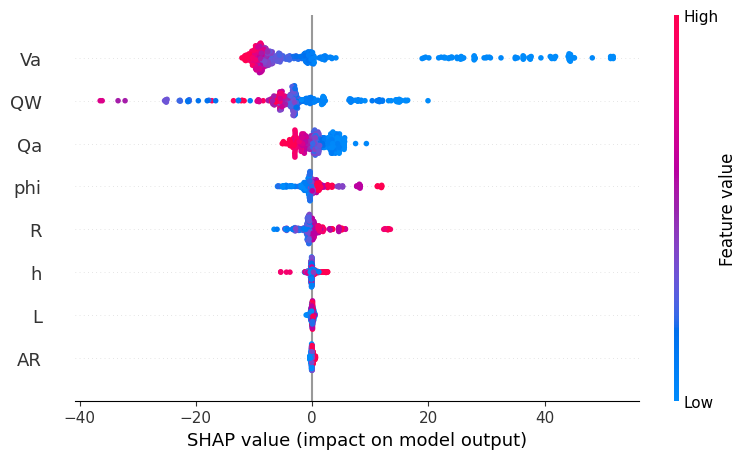

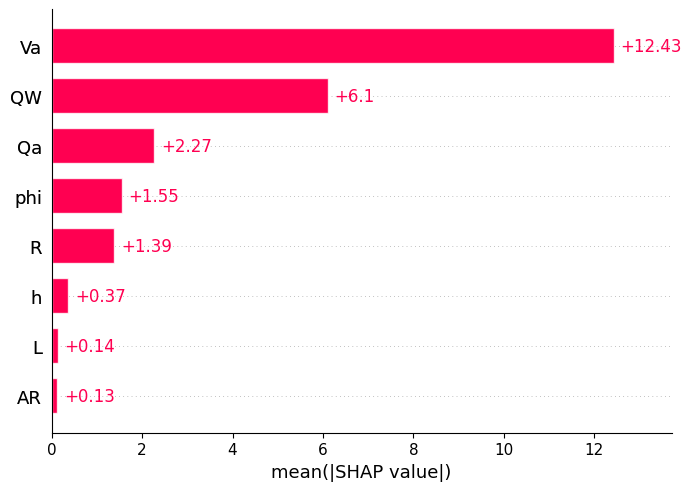

In [ ]:
SHAP(gbm, X_train)  # explain training predictions

### Testing

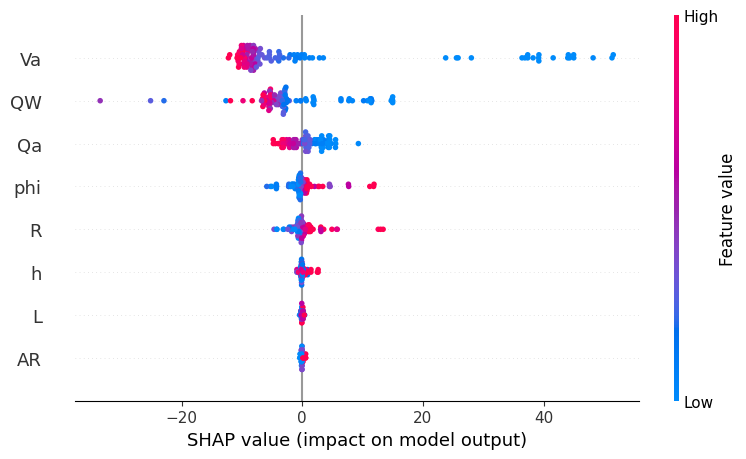

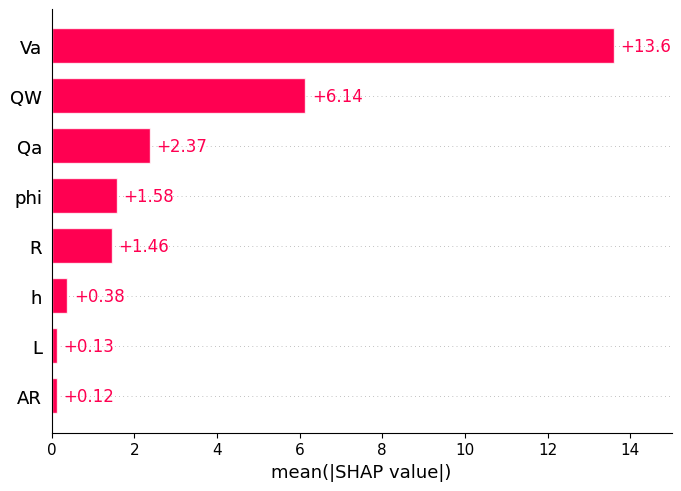

In [ ]:
SHAP(gbm, X_test)

## Non Dimensional

In [ ]:
# Load and rename columns
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/non_dim.csv")
df.columns = ['AR', 'phi', 'R/L', 'Fr', 'Qa/Qw', 'sigma']
X = df.drop(columns=['sigma'])
y = df['sigma']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
params_gbm_20 = {'n_estimators': 252, 'max_depth': 8, 'learning_rate': 0.06285652370947764, 'subsample': 0.8059737929229986, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': None}
gbm = GradientBoostingRegressor(**params_gbm_20)
gbm.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.06285652370947764, max_depth=8,
                          min_samples_leaf=5, min_samples_split=9,
                          n_estimators=252, subsample=0.8059737929229986)

### Training

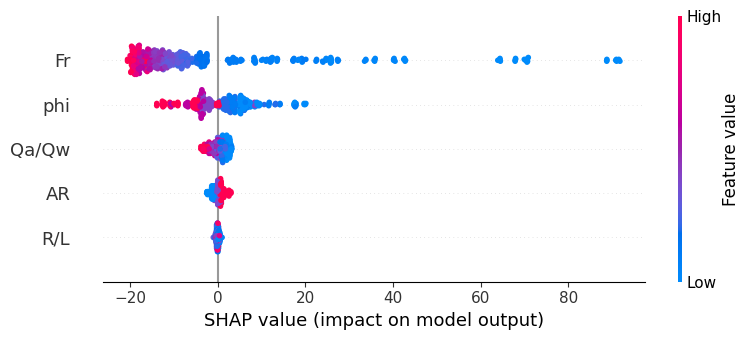

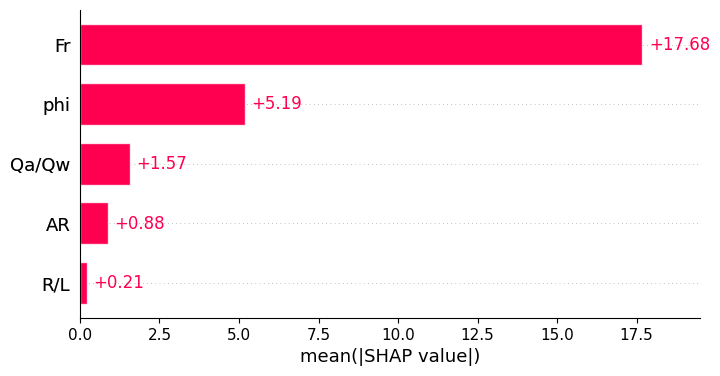

In [ ]:
SHAP(gbm,X_train)

### Testing

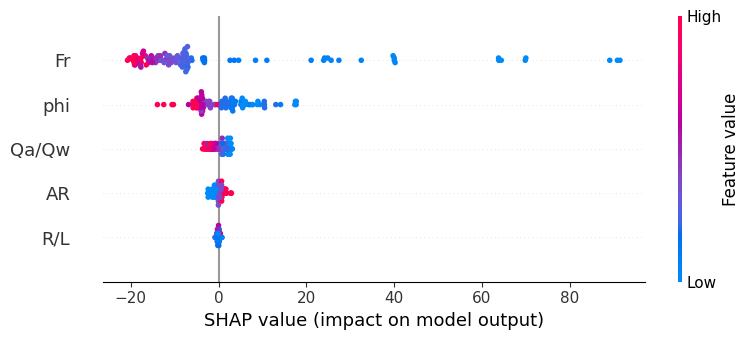

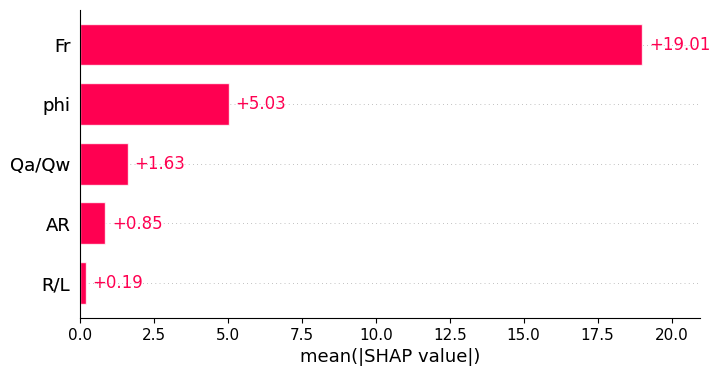

In [ ]:
SHAP(gbm,X_test)